#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, mean_absolute_error

#Data Check


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


#EDA

In [ ]:
def show_bar(data, kind, title, xlabel):
    fig, ax = plt.subplots(figsize=(8, 3))
    data.plot(kind=kind, ax=ax, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
print("Maximum Value:", data['age'].max())
print("Minimum Value:", data['age'].min())

Maximum Value: 64
Minimum Value: 18


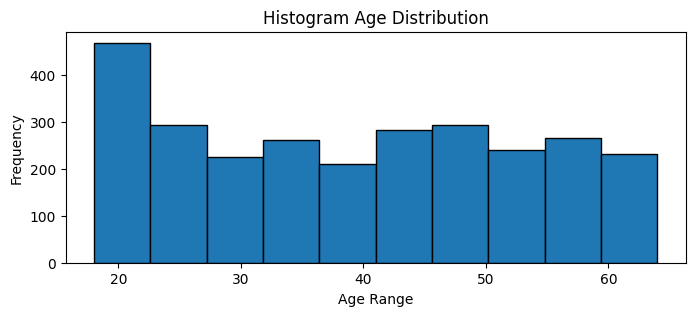

In [ ]:
show_bar(data['age'], 'hist', 'Histogram Age Distribution', 'Age Range')

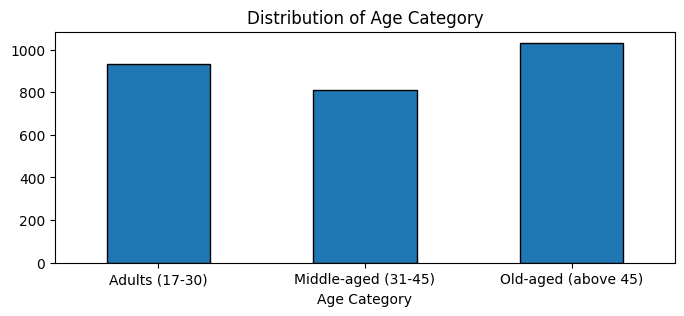

In [ ]:
bins = [17, 30, 45, float('inf')]
labels = ['Adults (17-30)', 'Middle-aged (31-45)', 'Old-aged (above 45)']
Frequency = pd.cut(data['age'], bins=bins, labels=labels, right=True).value_counts().sort_index()
show_bar(Frequency, 'bar', 'Distribution of Age Category', 'Age Category')

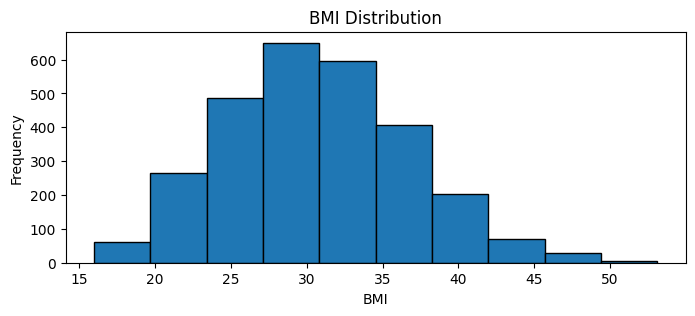

In [ ]:
show_bar(data['bmi'], 'hist', 'BMI Distribution', 'BMI')

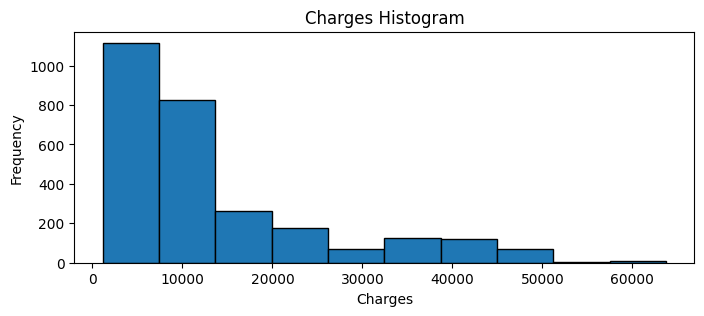

In [ ]:
show_bar(data['charges'], 'hist', 'Charges Histogram', 'Charges')

Text(0.5, 1.0, 'Stroke and Average Glucose Level Box Plot')

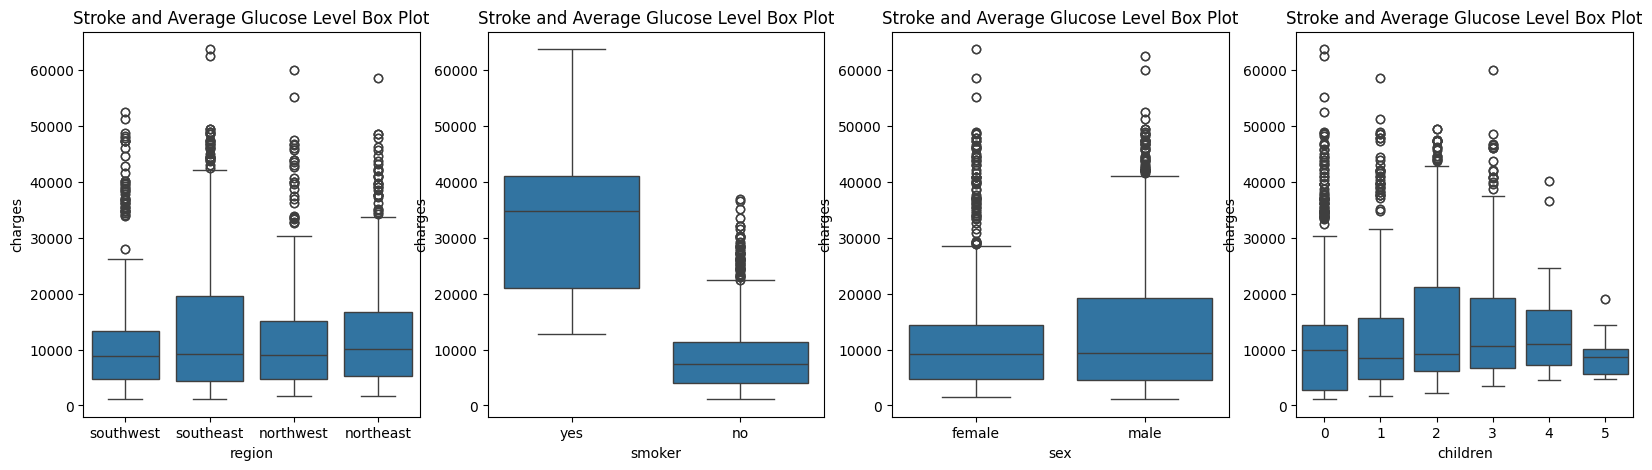

In [ ]:
fig, (graph1, graph2, graph3, graph4) = plt.subplots(1,4, figsize = (20,5))

ax1 = sns.boxplot(data=data, x='region', y='charges', ax = graph1)
ax1.set_title("Stroke and Average Glucose Level Box Plot")

ax2 = sns.boxplot(data=data, x='smoker', y='charges', ax = graph2)
ax2.set_title("Stroke and Average Glucose Level Box Plot")

ax3 = sns.boxplot(data=data, x='sex', y='charges', ax = graph3)
ax3.set_title("Stroke and Average Glucose Level Box Plot")

ax4 = sns.boxplot(data=data, x='children', y='charges', ax = graph4)
ax4.set_title("Stroke and Average Glucose Level Box Plot")

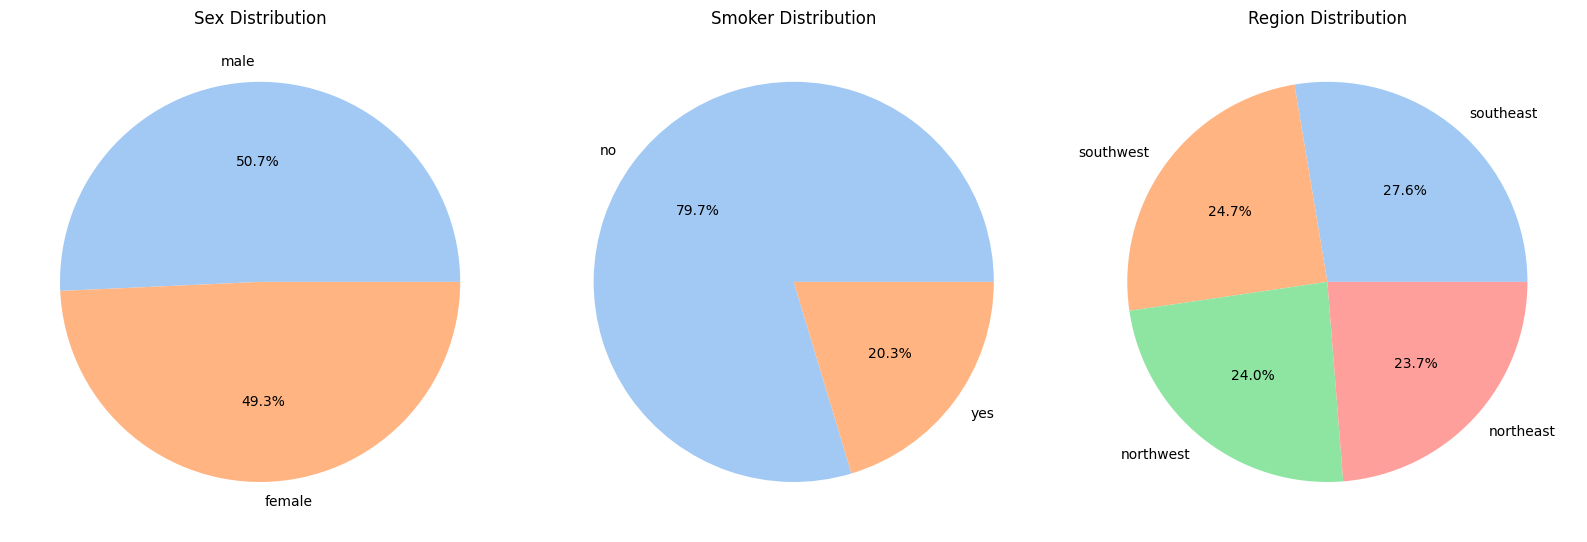

In [ ]:
columns = ['sex', 'smoker', 'region']
titles = ['Sex Distribution', 'Smoker Distribution', 'Region Distribution']
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    frequency = data[column].value_counts()
    axs[i].pie(frequency, labels=frequency.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[i].set_title(titles[i])
plt.tight_layout()
plt.show()

#Data-Preprocessing

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [ ]:
sex_dummies = pd.get_dummies(data['sex'], dtype=int, drop_first=True)
smoker_dummies = pd.get_dummies(data['smoker'], dtype=int, drop_first=True)
region_dummies = pd.get_dummies(data['region'], dtype=int, drop_first=False)

data = pd.concat([data.iloc[:, :-1], region_dummies, data.iloc[:, -1]], axis=1)
data.drop(columns=['region'], inplace=True)
data['sex'] = sex_dummies
data['smoker'] = smoker_dummies

data

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,0,1,0,8569.86180
2768,21,0,34.600,0,0,0,0,0,1,2020.17700
2769,19,1,26.030,1,1,0,1,0,0,16450.89470
2770,23,1,18.715,0,0,0,1,0,0,21595.38229


In [ ]:
correlation = data.corr()['charges']
print(correlation)

age          0.298624
sex          0.062837
bmi          0.199846
children     0.066442
smoker       0.788783
northeast    0.009850
northwest   -0.036874
southeast    0.075652
southwest   -0.051686
charges      1.000000
Name: charges, dtype: float64


In [ ]:
data = data.drop(['northeast', 'northwest', 'southeast', 'southwest'], axis=1)

#Data Spliting

In [ ]:
X = data.drop('charges', axis = 1)
y = data[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.values.reshape(-1)

#RF Modeling

In [ ]:

model = RandomForestRegressor(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1
)


model.fit(X_train, y_train)



RandomForestRegressor(max_features='sqrt', random_state=42)

#Evaluation


In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Random Forest MAE: {mae}")
print(f"Random Forest MSE: {mse}")
print(f"Random Forest R²: {r2}")

Random Forest MAE: 1215.6067515355496
Random Forest MSE: 6280591.158830846
Random Forest R²: 0.9578569165122531


#Turing


In [ ]:
# Define the parameter grid to sample from
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Random Forest MAE: {mae}")
print(f"Random Forest MSE: {mse}")
print(f"Random Forest R²: {r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Random Forest MAE: 1648.1462494529458
Random Forest MSE: 9480874.521720288
Random Forest R²: 0.9363828537153039


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Possible hyperparameter values to tune
n_estimators_list = [50, 100, 200, 300]
max_depth_list = [None, 10, 20, 30]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

# Store results for comparison
results = []

# Loop through all combinations of hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                # Initialize the model with current hyperparameters
                model = RandomForestRegressor(
                    random_state=42,
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    max_features='sqrt',
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )

                # Fit the model
                model.fit(X_train, y_train)

                # Make predictions
                y_pred = model.predict(X_test)

                # Evaluate the model
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Store the results
                results.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'MAE': mae,
                    'MSE': mse,
                    'R²': r2
                })

                # Print the results for this set of hyperparameters
                print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, "
                      f"min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}")
                print(f"MAE: {mae}, MSE: {mse}, R²: {r2}\n")

# Sort results by MSE for easy comparison
sorted_results = sorted(results, key=lambda x: x['MSE'])

# Print the best result based on MSE
best_result = sorted_results[0]
print(f"Best Parameters: n_estimators={best_result['n_estimators']}, "
      f"max_depth={best_result['max_depth']}, "
      f"min_samples_split={best_result['min_samples_split']}, "
      f"min_samples_leaf={best_result['min_samples_leaf']}")
print(f"Best MAE: {best_result['MAE']}, Best MSE: {best_result['MSE']}, Best R²: {best_result['R²']}")


n_estimators: 50, max_depth: None, min_samples_split: 2, min_samples_leaf: 1
MAE: 1218.8116857498533, MSE: 6316154.778721673, R²: 0.9576182828288492

n_estimators: 50, max_depth: None, min_samples_split: 2, min_samples_leaf: 2
MAE: 1829.8394046485894, MSE: 11983620.227983473, R²: 0.9195893037802237

n_estimators: 50, max_depth: None, min_samples_split: 2, min_samples_leaf: 4
MAE: 2161.8029759662477, MSE: 15835664.877972845, R²: 0.8937418898700258

n_estimators: 50, max_depth: None, min_samples_split: 5, min_samples_leaf: 1
MAE: 1654.111207719078, MSE: 9319609.235545747, R²: 0.9374649519202434

n_estimators: 50, max_depth: None, min_samples_split: 5, min_samples_leaf: 2
MAE: 1847.4103686969802, MSE: 12275223.303029343, R²: 0.9176326324373258

n_estimators: 50, max_depth: None, min_samples_split: 5, min_samples_leaf: 4
MAE: 2161.8029759662477, MSE: 15835664.877972845, R²: 0.8937418898700258

n_estimators: 50, max_depth: None, min_samples_split: 10, min_samples_leaf: 1
MAE: 1972.612289714

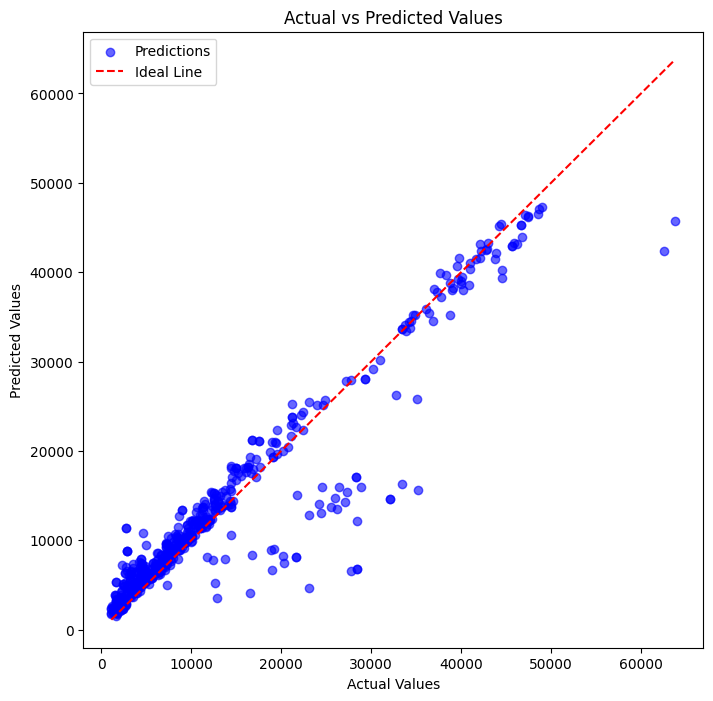

In [ ]:
def plot_predictions(y_test, y_pred):

    plt.figure(figsize=(8, 8))


    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")


    max_val = max(np.max(y_test), np.max(y_pred))
    min_val = min(np.min(y_test), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Ideal Line")


    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()


    plt.show()


plot_predictions(y_test, y_pred)

#SVR Modeling


In [ ]:

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X_train and X_test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale y (important to reshape it before scaling)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the SVR model with default parameters
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train_scaled, y_train_scaled)


SVR()

#SVR Evaluation


In [ ]:
#  Predict on the test set
y_pred_scaled = svr_model.predict(X_test_scaled)

#  Inverse-transform the scaled predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

#  Evaluate the model using MAE, MSE, and R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR R²: {r2_svr}")


SVR MAE: 2306.4258417990795
SVR MSE: 22258056.15394061
SVR R²: 0.8506473204434638


#SVR Turing

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid to sample from
param_dist = {
    'C': uniform(loc=0.1, scale=10),
    'epsilon': uniform(loc=0, scale=0.5),
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the SVR model
svr_model = SVR()

# Initialize RandomizedSearchCV
random_search_svr = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to find the best parameters
random_search_svr.fit(X_train_scaled, y_train_scaled)

# Get the best model with tuned hyperparameters
best_svr_model = random_search_svr.best_estimator_

# Make predictions with the best model
y_pred_scaled = best_svr_model.predict(X_test_scaled)

# Inverse-transform the scaled predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the tuned model
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Print the results
print(f"Best Parameters: {random_search_svr.best_params_}")
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR R²: {r2_svr}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 3.845401188473625, 'degree': 2, 'epsilon': 0.0917173949330819, 'gamma': 'auto', 'kernel': 'rbf'}
SVR MAE: 2197.328258050544
SVR MSE: 21841119.406064298
SVR R²: 0.853444987053263


In [ ]:
# Manually tuning the model by changing hyperparameters
svr_model_tuned = SVR(kernel='rbf', C=10, epsilon=0.05)  # Adjusting C and epsilon

# Fit the tuned model
svr_model_tuned.fit(X_train_scaled, y_train_scaled)

# Predict with the tuned model
y_pred_scaled_tuned = svr_model_tuned.predict(X_test_scaled)
y_pred_tuned = scaler_y.inverse_transform(y_pred_scaled_tuned.reshape(-1, 1)).flatten()

# Evaluate the tuned model
mae_svr_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_svr_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_svr_tuned = r2_score(y_test, y_pred_tuned)

# Print the evaluation metrics for the tuned model
print(f"Tuned SVR MAE: {mae_svr_tuned}")
print(f"Tuned SVR MSE: {mse_svr_tuned}")
print(f"Tuned SVR R²: {r2_svr_tuned}")


Tuned SVR MAE: 1875.1208738251585
Tuned SVR MSE: 21852514.341116786
Tuned SVR R²: 0.8533685264642659


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Possible hyperparameter values to tune
C_list = [0.1, 1, 5, 10]
epsilon_list = [0.01, 0.1, 0.2]
kernel_list = ['rbf', 'poly', 'linear']
gamma_list = ['scale', 'auto']
degree_list = [2, 3, 4]

# Store results for comparison
results = []

# Loop through all combinations of hyperparameters
for C in C_list:
    for epsilon in epsilon_list:
        for kernel in kernel_list:
            for gamma in gamma_list:
                if kernel == 'poly':
                    # Only test 'degree' when the kernel is 'poly'
                    for degree in degree_list:
                        # Initialize the model with current hyperparameters
                        model = SVR(C=C, epsilon=epsilon, kernel=kernel, gamma=gamma, degree=degree)

                        # Fit the model
                        model.fit(X_train_scaled, y_train_scaled)

                        # Make predictions
                        y_pred_scaled = model.predict(X_test_scaled)

                        # Inverse-transform the scaled predictions back to the original scale
                        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

                        # Evaluate the model
                        mae = mean_absolute_error(y_test, y_pred)
                        mse = mean_squared_error(y_test, y_pred)
                        r2 = r2_score(y_test, y_pred)

                        # Store the results
                        results.append({
                            'C': C,
                            'epsilon': epsilon,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree,
                            'MAE': mae,
                            'MSE': mse,
                            'R²': r2
                        })

                        # Print the results for this set of hyperparameters
                        print(f"C: {C}, epsilon: {epsilon}, kernel: {kernel}, gamma: {gamma}, degree: {degree}")
                        print(f"MAE: {mae}, MSE: {mse}, R²: {r2}\n")
                else:
                    # For non-'poly' kernels, don't include 'degree' in tuning
                    model = SVR(C=C, epsilon=epsilon, kernel=kernel, gamma=gamma)

                    # Fit the model
                    model.fit(X_train_scaled, y_train_scaled)

                    # Make predictions
                    y_pred_scaled = model.predict(X_test_scaled)

                    # Inverse-transform the scaled predictions back to the original scale
                    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

                    # Evaluate the model
                    mae = mean_absolute_error(y_test, y_pred)
                    mse = mean_squared_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)

                    # Store the results
                    results.append({
                        'C': C,
                        'epsilon': epsilon,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': None,  # Not applicable for non-'poly' kernels
                        'MAE': mae,
                        'MSE': mse,
                        'R²': r2
                    })

                    # Print the results for this set of hyperparameters
                    print(f"C: {C}, epsilon: {epsilon}, kernel: {kernel}, gamma: {gamma}")
                    print(f"MAE: {mae}, MSE: {mse}, R²: {r2}\n")

# Sort results by MSE for easy comparison
sorted_results = sorted(results, key=lambda x: x['MSE'])

# Print the best result based on MSE
best_result = sorted_results[0]
print(f"Best Parameters: C={best_result['C']}, epsilon={best_result['epsilon']}, "
      f"kernel={best_result['kernel']}, gamma={best_result['gamma']}, degree={best_result['degree']}")
print(f"Best MAE: {best_result['MAE']}, Best MSE: {best_result['MSE']}, Best R²: {best_result['R²']}")


C: 0.1, epsilon: 0.01, kernel: rbf, gamma: scale
MAE: 2205.0619460629264, MSE: 28605502.9375641, R²: 0.8080556323409586

C: 0.1, epsilon: 0.01, kernel: rbf, gamma: auto
MAE: 2205.0619460629264, MSE: 28605502.9375641, R²: 0.8080556323409586

C: 0.1, epsilon: 0.01, kernel: poly, gamma: scale, degree: 2
MAE: 4626.182894773075, MSE: 53770776.88264669, R²: 0.6391953747570116

C: 0.1, epsilon: 0.01, kernel: poly, gamma: scale, degree: 3
MAE: 2302.747119513201, MSE: 26662701.793013696, R²: 0.8210919260216508

C: 0.1, epsilon: 0.01, kernel: poly, gamma: scale, degree: 4
MAE: 2053.3857648677044, MSE: 26552440.405542288, R²: 0.8218317854935014

C: 0.1, epsilon: 0.01, kernel: poly, gamma: auto, degree: 2
MAE: 4626.182894773075, MSE: 53770776.88264669, R²: 0.6391953747570116

C: 0.1, epsilon: 0.01, kernel: poly, gamma: auto, degree: 3
MAE: 2302.747119513201, MSE: 26662701.793013696, R²: 0.8210919260216508

C: 0.1, epsilon: 0.01, kernel: poly, gamma: auto, degree: 4
MAE: 2053.3857648677044, MSE: 26

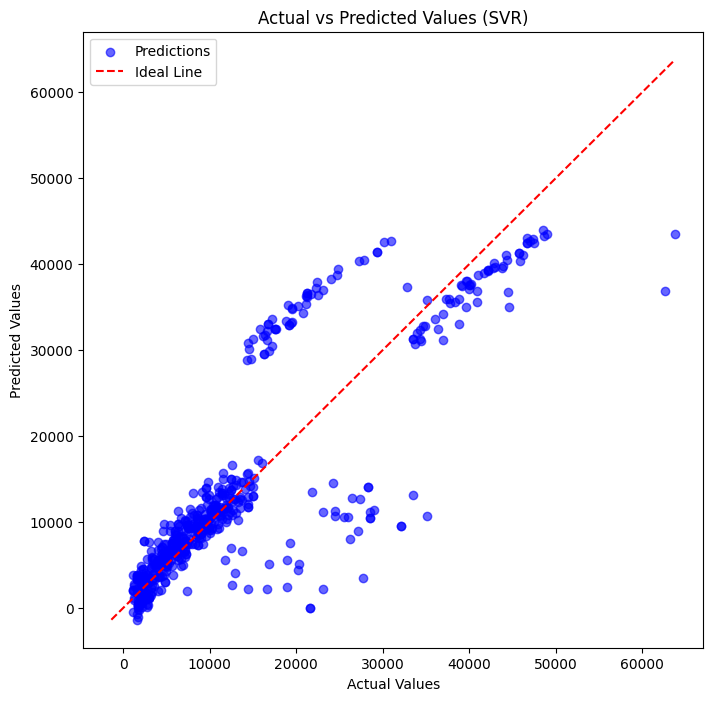

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_predictionssvr(y_test, y_pred):

    plt.figure(figsize=(8, 8))


    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")


    max_val = max(np.max(y_test), np.max(y_pred))
    min_val = min(np.min(y_test), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Ideal Line")


    plt.title('Actual vs Predicted Values (SVR)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()


    plt.show()


plot_predictionssvr(y_test, y_pred)
